### 화면을 분할하여 그래프 여러개 그리기 

- 여러 객체를 만들어 분할된 화면 마다 객체를 배정 
- 객체는 각각 다른 그래프를 표현 가능 
- figure() 함수를 사용하여 그림틀을 만든다.
- 그림틀 객체에 add_subplot() 메소드를 적용하여 그림틀을 분할 

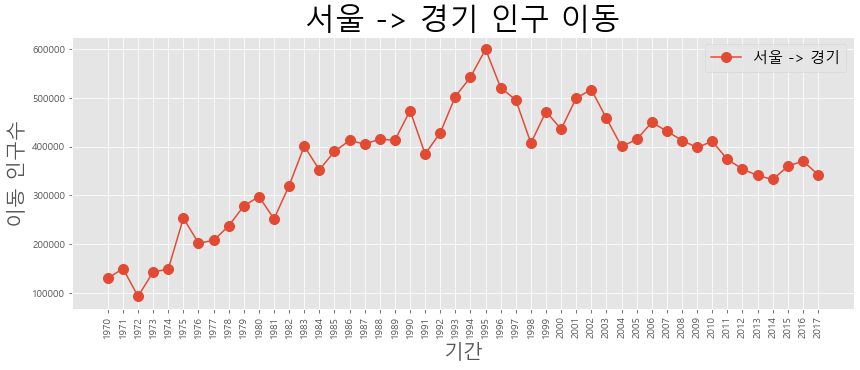

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc 
font_path = 'C:\\Users\\jswoo\\Desktop\\Repository\\Study_Data_Science\\Pandas_Data_Analytics\\Part04\\malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family = font_name)

path = 'C:\\Users\\jswoo\\Desktop\\Repository\\Study_Data_Science\\Pandas_Data_Analytics\\Part04\\시도별 전출입 인구수.xlsx'
df = pd.read_excel(path, header =0, engine='openpyxl')

df = df.fillna(method='ffill')

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis = 1)
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace =True)
df_seoul.set_index('전입지', inplace=True)

sr_one = df_seoul.loc['경기도']

plt.style.use('ggplot')

plt.figure(figsize=(14,5))

plt.xticks(size = 10, rotation = 'vertical')

plt.plot(sr_one, marker = 'o', markersize = 10)

plt.title('서울 -> 경기 인구 이동', size = 30)
plt.xlabel('기간', size = 20)
plt.ylabel('이동 인구수', size = 20)

# 범례 표시
plt.legend(labels = ['서울 -> 경기'], loc = 'best', fontsize = 15)

plt.show()

c:\Users\jswoo\Desktop\Repository\Study_Data_Science\venv\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
c:\Users\jswoo\Desktop\Repository\Study_Data_Science\venv\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


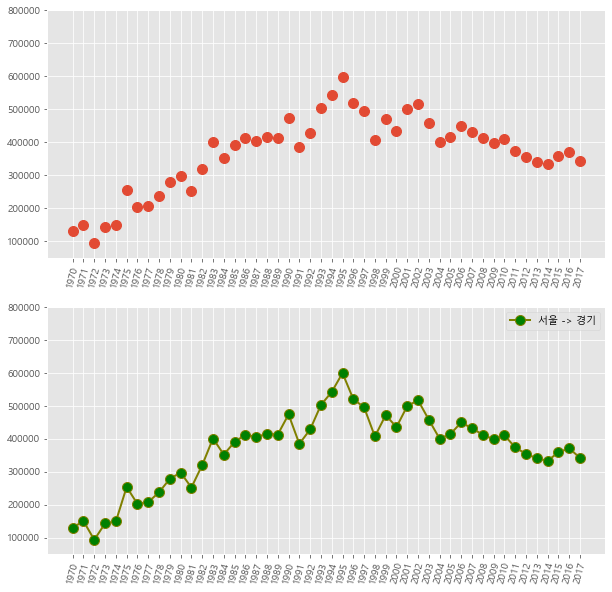

In [3]:
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(sr_one, 'o', markersize = 10)
ax2.plot(sr_one, marker = 'o', markerfacecolor = 'green', markersize = 10,
        color = 'olive', linewidth = 2, label = '서울 -> 경기' )
ax2.legend(loc = 'best')

ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

ax1.set_xticklabels(sr_one.index, rotation = 75)
ax2.set_xticklabels(sr_one.index, rotation = 75)

plt.show()